In [3]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results
from tools.simple_track_generator import trackGenerator

In [4]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 2
simulator.delta_d_max = 0.12
simulator.use_saved_data = False
simulator.save_data = True
simulator.simulate_model_type = ModelType.DYNAMIC
simulator.data_model_type = ModelType.DYNAMIC
simulator.filter_model_type = ModelType.DYNAMIC
simulator.t_sim = 13.0
simulator.num_predicted_traj = 10
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.5, 0.0, 0.0])
simulator.cur = 1/1.0
simulator.track_fun_name = 'oval_track'
simulator.lag = 10
simulator.save_predicted_traj = True
simulator.save_dataset_after = True
simulator.delete_dataset_after = True
simulator.v_x_max = 2.7

simulator.t_data = 10.0
t_new_data = simulator.t_data * 0.6
simulator.data_input_rule = InputRule.PRBS_TIMES_RANDOM_MEAN

# simulator.n_v_max = 0
simulator.n_x, simulator.n_y, simulator.n_psi, simulator.n_v = 0,0,0,0
simulator.n_e_lat_max, simulator.n_mu_max, simulator.n_v_max, simulator.n_l_max = 0,0,0,0 # for test of prediction error

random_seed = 0
track_filter_type = TrackFilterTypes.SINGLE_SEGMENT
filter_type = SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA
    
filter_param: List[Dict[str, Any]] = {
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_ZERO_V: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_STOP: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
        # {'lam_sig':50000, 'L': 100, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.1, 'min_num_slices': int(0.3*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.3, 'f': lambda x: np.exp(-x)},

        # {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.1, 'min_num_slices': int(0.35*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.3, 'f': lambda x: 1/(0.1+x)**4},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.1, 'min_num_slices': int(0.35*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.3, 'f': lambda x: np.exp(-(x+0.1))},

        # #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        # #  'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        # #  'min_dist': 0.1, 'min_num_slices': int(0.35*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.3, 'f': lambda x: np.exp(-(x-0.1)**2)},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 4, 'min_num_slices': int(0.25*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.2, 'f': lambda x: 1/(0.1+x)**2},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.05, 'min_num_slices': int(0.4*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.45, 'f': lambda x: 1/(0.1+x)**2},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 1, 'min_num_slices': int(0.35*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.3, 'f': lambda x: 1/(0.1+x)**4},

        {'lam_sig': 50000, 'L': 80, 'R': np.matrix('1,0;0,1'),
        'c': [[0.25, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        'min_dist': 0.1, 'min_num_slices': int(0.45*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.4, 'f': lambda x: 1/(1.1*x)**2},

        # {'lam_sig': 50000, 'L': 80, 'R': np.matrix('1,0;0,1'),
        # 'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        # 'min_dist': 0.1, 'min_num_slices': int(0.45*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.4, 'f': lambda x: 1/(1.1*x)**2},

        #  {'lam_sig': 50000, 'L': 85, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.29, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.1, 'min_num_slices': int(0.45*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.4, 'f': lambda x: 1/(1.1*x)**2},

        #  {'lam_sig': 50000, 'L': 85, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.29, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.1, 'min_num_slices': int(0.45*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.4, 'f': lambda x: 1/(1.1*x)**2},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        # 'c': [[0.3, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        # 'min_dist': 0.08, 'min_num_slices': int(0.55*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.45, 'f': lambda x: 1/(1.1*x)**2},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.3, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.08, 'min_num_slices': int(0.55*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.45, 'f': lambda x: 1/(1.1*x)**2},

        #  {'lam_sig': 50000, 'L': 90, 'R': np.matrix('1,0;0,1'),
        #  'c': [[0.3, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005]], 't_new_data': t_new_data,
        #  'min_dist': 0.08, 'min_num_slices': int(0.55*simulator.t_data/simulator.Ts), 'min_portion_slices': 0.45, 'f': lambda x: 1/(1.1*x)**2},

    ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }.get(filter_type)
simulation_input_rules = [
    SimulationInputRule.SINE_WITH_MEAN,
    SimulationInputRule.MAX_THROTTLE,
    SimulationInputRule.MAX_THROTTLE_SINE_STEER,
    ]
collection_rule = SimulationInputRule.RANDOM_WITH_MEAN

list_results_list = []
for params in filter_param:
    results_list = simulator.simulate_with_separate_collection(random_seed, track_filter_type, filter_type, params, collection_rule, simulation_input_rules, 10)
    list_results_list.append(results_list)


Running with initial dataset

Simulating with input rule SimulationInputRule.SINE_WITH_MEAN
And with first dataset list [1000]


At t = 0.00835489, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!

Simulating with input rule SimulationInputRule.MAX_THROTTLE
And with first dataset list [1000]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!


At t = 0.00252125, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Simulating with input rule SimulationInputRule.MAX_THROTTLE_SINE_STEER
And with first dataset list [1000]


At t = 0.0069057, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!


Simulating with input rule SimulationInputRule.RANDOM_WITH_MEAN
And with first dataset list [1000]


At t = 0.00737345, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Continue to simulate

Simulating with input rule SimulationInputRule.SINE_WITH_MEAN
And with first dataset list [1000, 204, 128]
vehicle moved to segment 1!
vehicle moved to segment 2!
Constraint not satisfied at time 3.5100000000000002.
Constraint satisfied again at time 3.64.
Constraint not satisfied at time 5.55.
Constraint satisfied again at time 5.79.
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!

Si

At t = 0.000605298, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.000970766, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Simulating with input rule SimulationInputRule.MAX_THROTTLE_SINE_STEER
And with first dataset list [1000, 204, 128, 160, 124]
vehicle moved to segment 1!
vehicle moved to segment 2!


At t = 0.0058519, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!


And with first dataset list [1000, 204, 128, 160, 124]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Continue to simulate

Simulating with input rule SimulationInputRule.SINE_WITH_MEAN
And with first dataset list [1000, 204, 128, 160, 124, 156, 120]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to

At t = 0.000617268, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Simulating with input rule SimulationInputRule.MAX_THROTTLE_SINE_STEER
And with first dataset list [1000, 204, 128, 160, 124, 156, 120]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
Constraint not satisfied at time 9.49.
vehicle moved to segment 1!
Constraint satisfied again at time 9.66.
vehicle moved to segment 2!


And with first dataset list [1000, 204, 128, 160, 124, 156, 120]
vehicle moved to segmen

At t = 0.00420511, mxstep steps taken before reaching tout.


Constraint satisfied again at time 2.69.
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!

Simulating with input rule SimulationInputRule.MAX_THROTTLE
And with first dataset list [1000, 204, 128, 160, 124, 156, 120, 160, 120]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!


At t = 0.00285031, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results

Simulating with input rule SimulationInputRule.MAX_THROTTLE_SINE_STEER
And with first dataset list [1000, 204, 128, 160, 124, 156, 120, 160, 120]
Constraint not satisfied at time 0.54.
Constraint satisfied again at time 0.6.
vehicle moved to segment 1!
vehicle moved to segment 2!


At t = 0.0091413, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00629608, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!


At t = 0.00289825, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


And with first dataset list [1000, 204, 128, 160, 124, 156, 120, 160, 120]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Continue to simulate

Simulating with input rule SimulationInputRule.SINE_WITH_MEAN
And with first dataset list [1000, 204, 128, 160, 124, 156, 120, 160, 120, 164, 124]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!

Simulating with input rule SimulationInputRule.MAX_THROTTLE

At t = 0.00774048, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00393689, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

Simulating with input rule SimulationInputRule.MAX_THROTTLE_SINE_STEER
And with first dataset list [1000, 204, 128, 160, 124, 156, 120, 160, 120, 164, 124]
vehicle moved to segment 1!
vehicle moved to segment 2!


At t = 0.00369799, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!


At t = 0.00744814, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results

Concluding simulation, with 24 results collected.



24


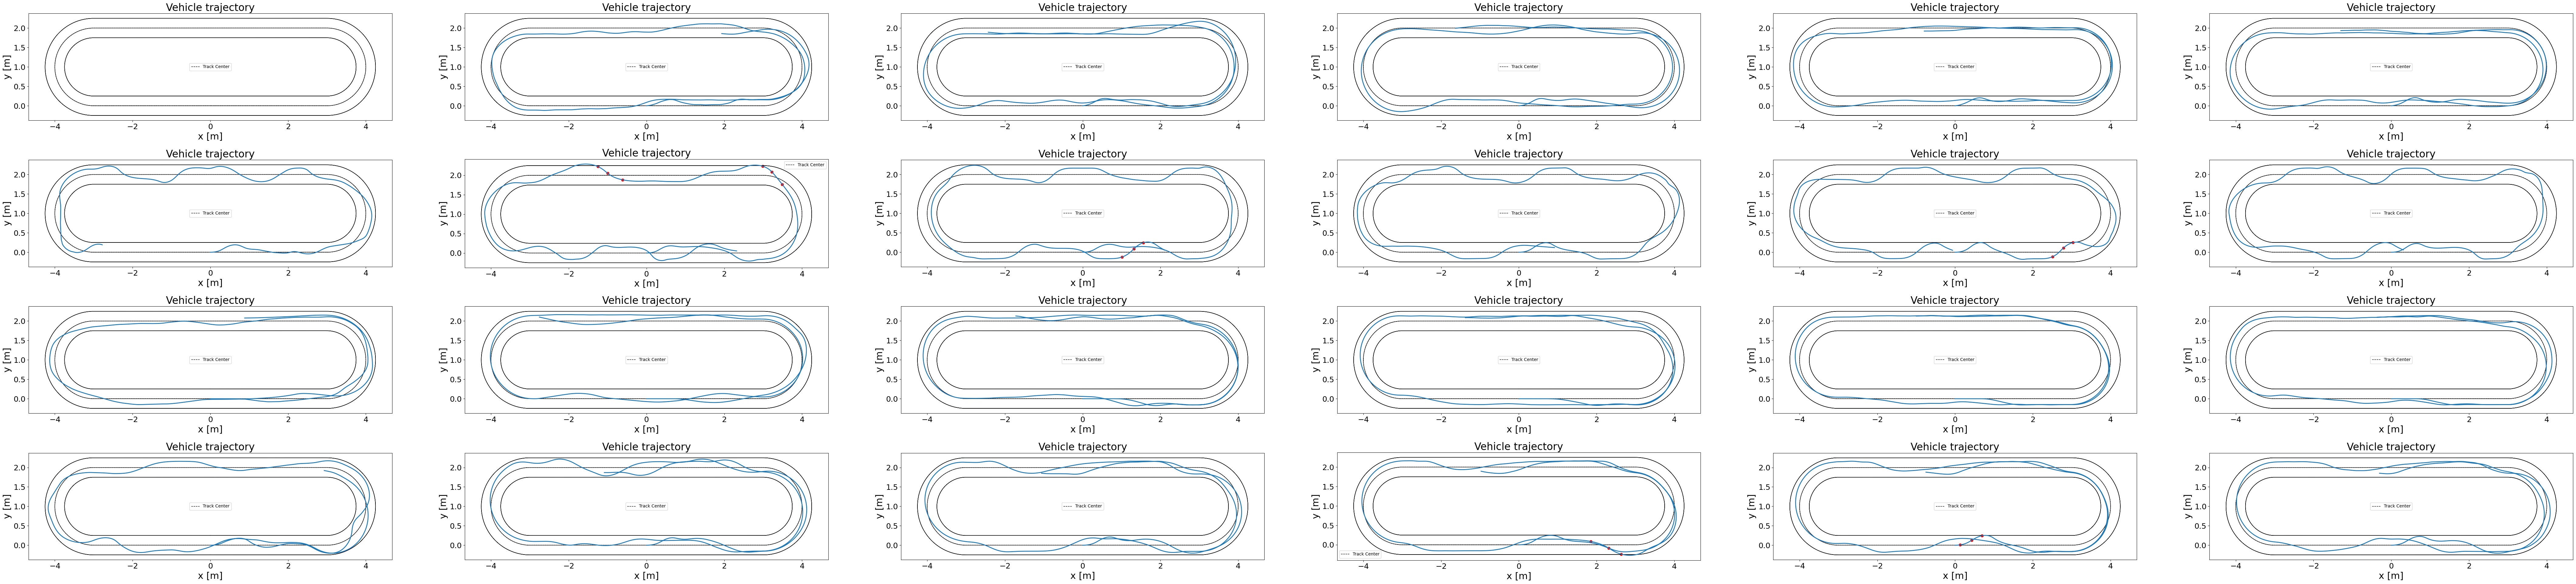

In [15]:
results_list: List[Results] = list_results_list[0]
print(len(results_list))
# plot global trajectory and track
n_cols, n_rows = int((len(results_list))/(len(simulation_input_rules)+1)), len(simulation_input_rules)+1
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(18*n_cols,6*n_rows))
for i in range(n_rows):
    for j in range(n_cols):
        results = results_list[i+j*n_rows]
        if results is not None:
            results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator, plot_marked_steps=True)
plt.show()
if save_fig:
    fig.savefig('fig/track_simulation.pdf', bbox_inches='tight')

In [6]:
# investigate the input intervention
for results in results_list[1:4]:
    print(results.average_intervention)
print("\n")
for results in results_list[-3:]:
    print(results.average_intervention)

[0.74109627 0.42797975]
[0.82111247 0.29498488]
[0.82574713 0.46760919]


[0.6129139 0.4119907]
[0.77992446 0.27466723]
[0.76723849 0.38249331]


In [7]:
import datetime
import os
import pickle
time = f"{datetime.datetime.now():%m-%d_%H_%M}"
file_name = time + "-" + "results_list" + ".pkl"
with open(os.path.join(os.getcwd(), 'datasets', file_name), 'wb') as file:
    pickle.dump(results_list, file)

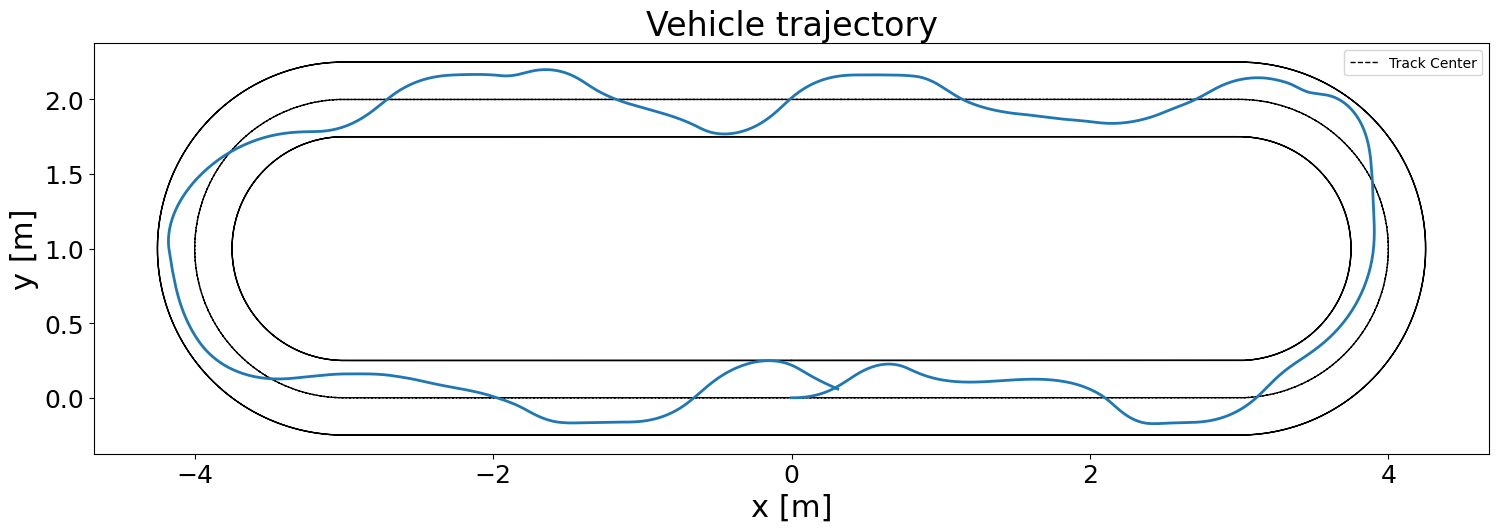

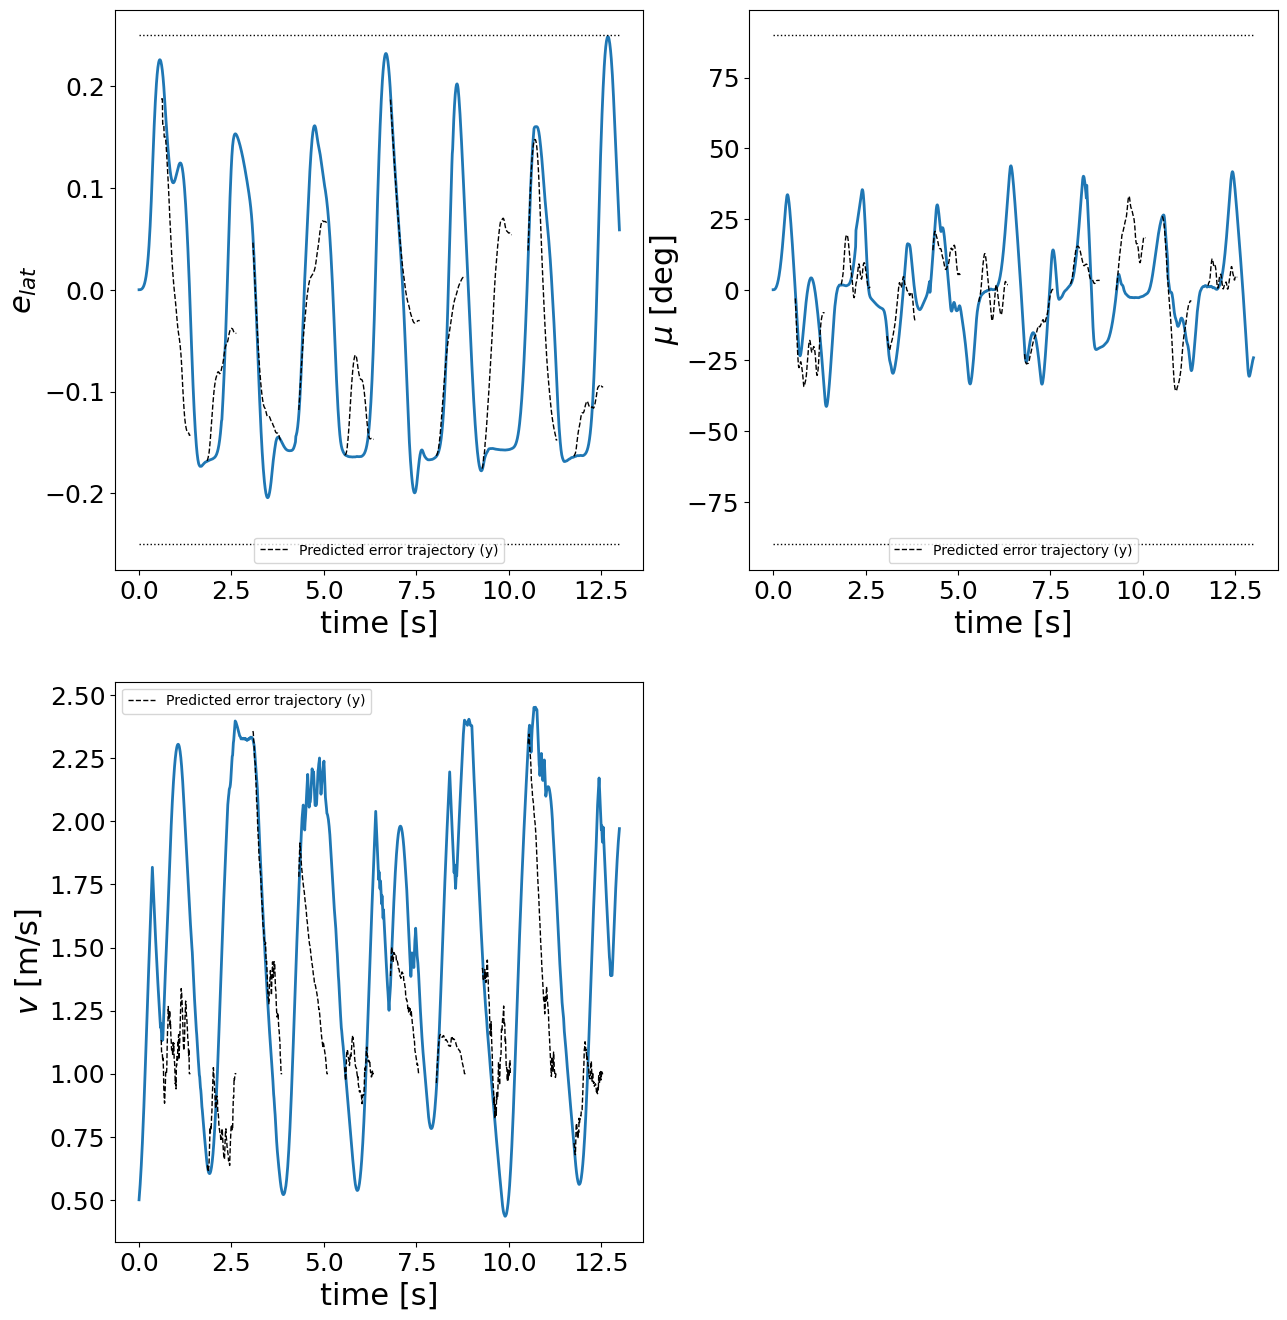

In [28]:
# choose one result to plot details
results = results_list[-3]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]
fig, ax = plt.subplots(figsize=(18,6))
results.plot_vehicle_trajectory(ax=ax, gen=simulator.track_generator, plot_marked_steps=True)
plt.savefig('fig/track-simulation-single-trajectory.pdf', bbox_inches='tight')

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

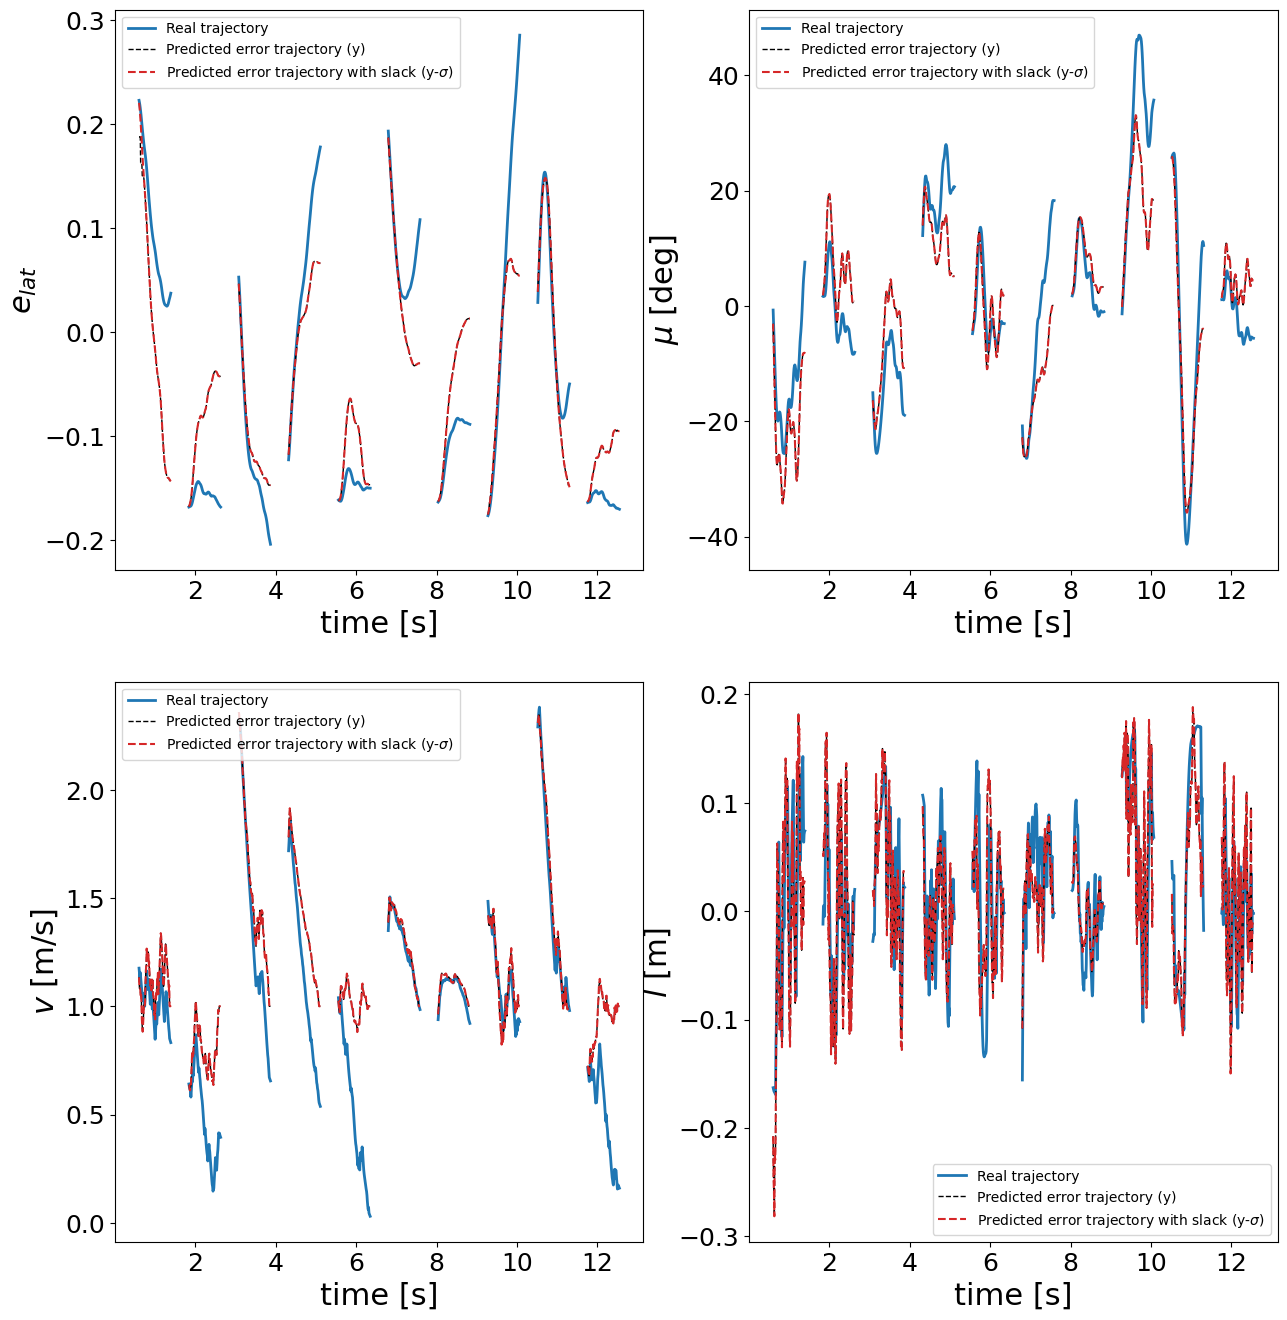

In [17]:
# plot given predicted trajectory and real trajectory
# plt.rcParams['text.usetex'] = True
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
time_spans = [(t-0.5, t) for t in results.violating_time_steps[0:1]]
# results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_error_slices(0, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(0, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(0, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(222)
# results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_error_slices(1, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(1, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(1, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(223)
# results.plot_error_trajectory(2, ax)
results.plot_error_slices(2, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(2, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(2, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
ax = plt.subplot(224)
# results.plot_error_trajectory(2, ax)
results.plot_error_slices(3, ax, line_style=results.trajecory_style, time_span=time_spans)
results.plot_predicted_error_slices(3, ax, label_y_axis=True, time_span=time_spans)
results.plot_predicted_error_with_slack_slices(3, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5}, time_span=time_spans)
plt.show()

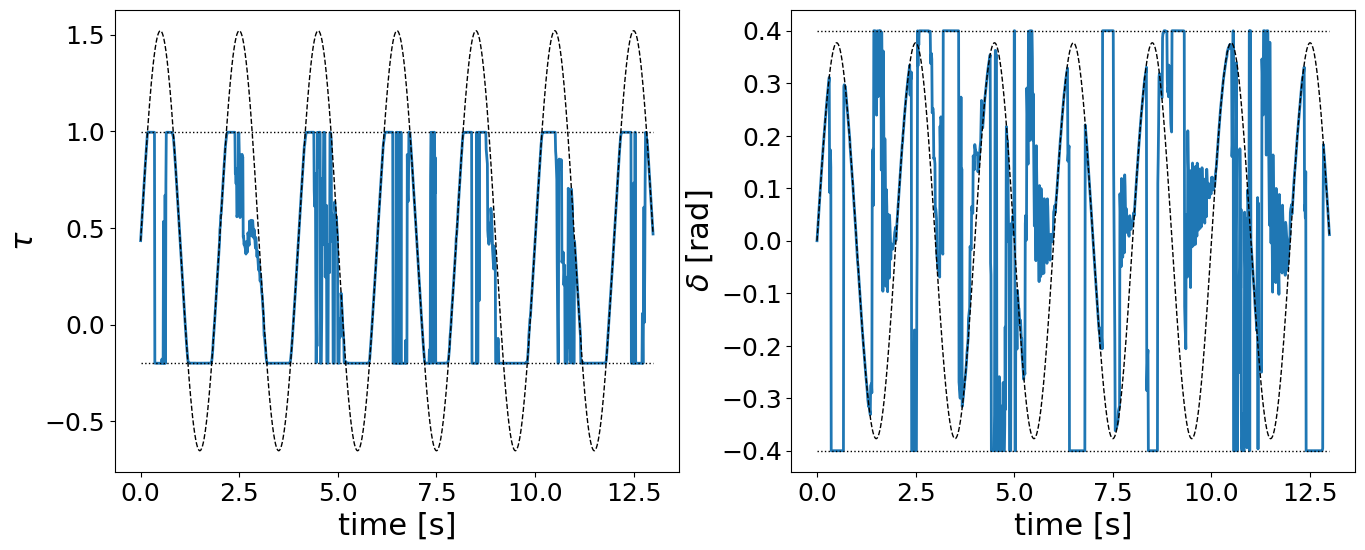

In [26]:
# plot given and applied inputs
plt.figure(figsize=(16,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
# plt.show(block=True)
plt.savefig('fig/track_simulation_inputs.pdf', bbox_inches='tight')

In [19]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(1.774131675069679e-06, 0.0895644588543191)


In [20]:
sigma_max[1]/np.pi*180

5.131665486725601

In [21]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

In [22]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

NameError: name 'dict_results' is not defined

In [ ]:
io_data = simulator.io_data_dict[1/0.5]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

KeyError: 2.0

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[1,0] for u in io_data._input_data])

In [ ]:
error_list = []
for predicted_traj, real_traj in zip(results._predicted_error_with_slack_slices, results._error_trajectory_slices):
    predicted_traj = predicted_traj[1] # extract trajectory
    real_traj = real_traj[1] # extract trajectory
    for predicted_state, real_state in zip(predicted_traj[:], real_traj[:]):
        error_list.append(predicted_state - real_state)

In [ ]:
np.sqrt(np.sum([error[0]**2 for error in error_list])/len(error_list))

In [ ]:
i = 2
# print(simulator.systems[i].cur)
io_data_list = simulator.filter._safety_filters[i]._io_data_list
for io_data in io_data_list:
    print(len(io_data._input_data))

In [ ]:
import os
import pickle
# # curvature, sample time, [list of time length of io_datas]
# with open(os.path.join(os.getcwd(), 'datasets', f'io_data_random_2.0_0.01_160_240.pkl'), 'wb') as file:
#                         pickle.dump(io_data_list, file)

In [ ]:
results.mean_calculation_time

In [ ]:
print(len(simulator.buffer_u_value[0][1]))
print(simulator.buffer_u_value[0][1][0])
print(len(simulator.buffer_y_value[0][1]))
print(simulator.buffer_y_value[0][1][0])


In [ ]:
# from scipy.spatial import ConvexHull, Voronoi
# H_uy = results.H_uy
# H_uy = np.array(H_uy.T)

# vor = Voronoi(H_uy)
# cov_hull = ConvexHull(H_uy)